# Examen parcial 2 (raizes y ~interpolacion)
* Antes de enviar el archivo, $\textbf{reiniciar y ejecutar el kernel}$ para ver que el archivo se compila sin errores
* enviar el archivo jupyter sin anexos antes de las 10.10am del 04.03.2022 a mi dirección de correo electrónico: michal.hemmerling@udea.edu.co 

In [5]:
##            JOSE LUIS TORRES LOPEZ CC 1010001242

import random  
import numpy as np      #LIBRERIAS
import matplotlib.pyplot as plt  
import pandas as pd
import random as rd
from scipy.optimize import curve_fit as CF 
import time 
from scipy import optimize
from scipy.misc import derivative as dv
import scipy.optimize as optimize


# Ejercicio

Bajo ciertas condiciones, los dispositivos ópticos como los láseres pueden mostrar un comportamiento complejo en el perfil del rayo de luz.


<table><tr>
<td> <img src="nonlinear_behaviour.png" width="600" /> </td>
</tr></table>
 
Para un dispositivo óptico particular que consiste en un medio no lineal dentro de una cavidad óptica, esto sólo ocurre cuando la intensidad I se encuentra dentro de un cierto rango que está dado por la ecuación: 

$$f(x)=(x+1)^2 - c(x-1) < 0 $$

donde $x$ es la intensidad del campo eléctrico y $c$ es la fuerza de la absorción del 
medio no lineal. 

## 1. 
Cree una función llamada `f_cost` que reciba dos parámetros (x,c) y solo devuelva la función f(x) como se mencionó anteriormente.

In [11]:
#  FUNCION 

def f_cost(x,c):

  f = (x+1)**2 - c*(x-1)


  return f

In [12]:
f_cost(96.95,100)

-0.7974999999987631

## 2. 
Usando funcion `f_cost` haz un gráfico con cuatro curvas para c=5,10,15,20 y con x entre -10,20 (50 puntos)
* hacer que cada curva sea de un color diferente
* añadir etiquetas

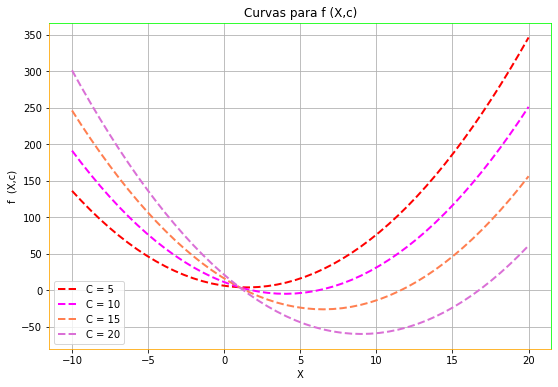

In [16]:
#GRAFICO
Num_puntos = 50 
X = np.linspace(-10,20,Num_puntos)

plt.figure(figsize=(9,6))
plt.plot(X,f_cost(X,5),"--",color="red",lw=2,label="C = 5")
plt.plot(X,f_cost(X,10),"--",color="fuchsia",lw=2,label="C = 10")
plt.plot(X,f_cost(X,15),"--",color="coral",lw=2,label="C = 15")
plt.plot(X,f_cost(X,20),"--",color="orchid",lw=2,label="C = 20")

plt.title("Curvas para f (X,c)")
plt.ylabel("f  (X,c)")
plt.xlabel("X")
#plt.ylim(-2,2)
#plt.xlim(-1,1)

#MARCO
P = plt.gca()
P.spines['right'].set_color('lime') 
P.spines['top'].set_color('lime')
P.spines['bottom'].set_color('orange') 
P.spines['left'].set_color('orange')

plt.legend()
plt.grid()
plt.show()


## 2a. Para cual `c` esta funcion no tiene raices?

**El valor de C para el cual la funcion definida anteriormente no tiene raices reales es C = 5** (( Segun el grafico )).

-Realizamos la comprobacion al tratar de buscar la raiz por metodo de root finding y observar que resulta en error.

In [ ]:
C=5
optimize.newton(f_cost, -5,args=(C,))

## 3. 
Cree una función llamada `root_finding()` que devuelva el valor de la raíz (si existiera) para cada parametro `c` (pense `Newton` o `bisecion`). Usando esta funcion vamos a buscar primero raiz izquierda y despues raiz derecha.

In [17]:
#METODO DE NEWTON
def root_finding(c,prox):
  #PROX: Punto mas proximo a la raiz, necesario para aplicar el metodo de Newton.
  root = optimize.newton(f_cost, prox,args=(c,))
  return root

In [18]:
root_finding(100,80)

96.95831523312721

## 4a. 
Primero vamos a mirar el comportamiento de raiz de lado izquierda: Defina el vector `c_vec` que contiene 50 valores de 5 a 100. En el loop, llame a la función `root_finding()` para cada valor `c` en el vector `c_vec`. Guarda los resultados en variable `left_roots`

In [19]:
Npoint = 50 
PROX= -600 #LADO IZQUIERDO
c_vec1 = np.linspace(8,100,Npoint)
left_roots=[]

for i in c_vec1:
  
  left_roots.append(root_finding(i,PROX))

## SE TUVO QUE REDEFINIR EL INTERVALO [5,100] A [8,100] PUES LOS VALORES PARA C=(5,6,7) NO TIENE RAICES REALES Y EL METODO DE 
## ROOT FINDING RESULTA EN ERROR.



## 4b 
Hacer un gráfico de raíz izquierda vs c

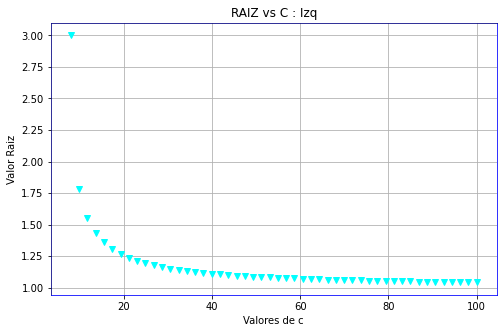

In [21]:
plt.figure(figsize=(8,5))
plt.plot(c_vec1,left_roots,"v",color="cyan",lw=5,)


plt.title("RAIZ vs C : Izq")
plt.ylabel("Valor Raiz")
plt.xlabel("Valores de c")
#plt.ylim(-2,2)
#plt.xlim(-1,1)

#MARCO
P = plt.gca()
P.spines['right'].set_color('blue') 
P.spines['top'].set_color('navy')
P.spines['bottom'].set_color('blue') 
P.spines['left'].set_color('navy')


plt.grid()
plt.show()

## 5a. 
Ahora vamos a mirar el comportamiento de raiz de lado derecha: Defina el vector `c_vec` que contiene 50 valores de 5 a 100. En el loop, llame a la función `root_finding()` para cada valor `c` en el vector `c_vec`. Guarda los resultados en variable `right_roots`.

In [22]:
Npoint = 50 
PROX= 800 #LADO DERECHO
c_vec2 = np.linspace(8,100,Npoint)
right_roots=[]

for i in c_vec2:
  
  right_roots.append(root_finding(i,PROX))

## 5b
* Hacer un gráfico de raíz derecha vs c

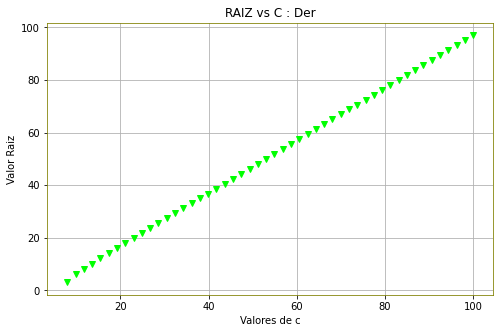

In [24]:
plt.figure(figsize=(8,5))
plt.plot(c_vec2,right_roots,"v",color="lime",lw=5,)


plt.title("RAIZ vs C : Der")
plt.ylabel("Valor Raiz")
plt.xlabel("Valores de c")
#plt.ylim(-2,2)
#plt.xlim(-1,1)

#MARCO
P = plt.gca()
P.spines['right'].set_color('olive') 
P.spines['top'].set_color('olive')
P.spines['bottom'].set_color('olive') 
P.spines['left'].set_color('Olive')


plt.grid()
plt.show()


## 6. 
Pregunta:
* este cierto *rango* para cual se obtiene un comportamiento complejo esta convergente o divergente cuando `c` es creciente
* si este rango esta convergiendo, ¿a qué valor?
* si este rango esta divergente, como esta divergente (lineal, cuadrático, diferente)

In [ ]:
RR = right_roots[40:50]
LL = left_roots[40:50]
df = pd.DataFrame()

df["Raiz Izquierda"]= LL
df["Raiz Derecha"]=RR


df

**Como se logra apreciar en la tabla:**

- El valor de la raiz por el lado izquierdo, tiene un comportamiento que converge a un unico valor cuando C se hace cada vez mas grande.

  - **Valor Aprox. Raiz = 1.041685**

- El valor de la raiz por el lado derecho, tiene un comportamiento divergente a medida que C aumenta.

  - La divergencia sigue una tendencia de **tipo lineal**

# Feedback:

`Correct implementation of the f_cost function + labeled plot 	  (max 2.0p):	2.0p`
`Correct implementation of the root finding function 		       (max 2.0p):	2.0p`
`Correct result of the evolution of the left roots (+ plot)	     (max 2.0p):	2.0p`
`Correct result of the evolution of the right roots (+ plot)	    (max 2.0p):	2.0p`
`Correct conclusion of the range behavious			              (max 2.0p):	2.0p`

`- Total:                                                          (max 10.0p):   10.0p`
`